<h3><center> Delivery Data Analysis </center></h3>

This dataset was downloaded from Kaggle which is popular with large storage of different data. This data was gathered from NYC restaurant. It contains food order and delivery.

#### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. **They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience**. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

The dataset contains the different data related to a food order. The detailed data dictionary is given below.
- **order_id**: Unique ID of the order
- **customer_id**: ID of the customer who ordered the food
- **restaurant_name**: Name of the restaurant
- **cuisine_type**: Cuisine ordered by the customer
- **cost**: Cost of the order
- **day_of_the_week**: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- **rating**: Rating given by the customer out of 5
- **food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- **delivery_time**: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Understanding data

In [2]:
import pandas as pd

filepath = 'D:\Projects\Delivery_data_analysis\\food_order.csv'
df = pd.read_csv(filepath)
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [3]:
# check the data types
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
# as we have object data we should see them also
df.describe(include='all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


### Data Wrangling


In [6]:
# we may use visualization tools
import matplotlib.pylab as plt

# evaluating missing data
missing_data = df.isnull()
missing_data

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1893,False,False,False,False,False,False,False,False,False
1894,False,False,False,False,False,False,False,False,False
1895,False,False,False,False,False,False,False,False,False
1896,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

order_id
order_id
False    1898
Name: count, dtype: int64

customer_id
customer_id
False    1898
Name: count, dtype: int64

restaurant_name
restaurant_name
False    1898
Name: count, dtype: int64

cuisine_type
cuisine_type
False    1898
Name: count, dtype: int64

cost_of_the_order
cost_of_the_order
False    1898
Name: count, dtype: int64

day_of_the_week
day_of_the_week
False    1898
Name: count, dtype: int64

rating
rating
False    1898
Name: count, dtype: int64

food_preparation_time
food_preparation_time
False    1898
Name: count, dtype: int64

delivery_time
delivery_time
False    1898
Name: count, dtype: int64



As shown above, each column has 1898 rows of data and all of them do not contain missing value. But Rating column has object data and it has categorial data which can be used for analysis and 'Not Given'. As we see, in df.info(), the 'Not Given' value's frequency is 736 which is large number. If we remove these values, they may need for future analysis. For now just leave it as that.

### Binning

In [8]:
import numpy as np 

bins = np.linspace(min(df['cost_of_the_order']), max(df['cost_of_the_order']), 4)
group_names = ['Low', 'Medium', 'High']
df['cost_of_the_order_binned'] = pd.cut(df['cost_of_the_order'], bins, labels=group_names, include_lowest=True)
# let's see these two rows
df[['cost_of_the_order', 'cost_of_the_order_binned']]

,cost_of_the_order,cost_of_the_order_binned
0,30.75,High
1,12.08,Low
2,12.23,Low
3,29.20,High
4,11.59,Low
...,...,...
1893,22.31,Medium
1894,12.18,Low
1895,25.22,High
1896,12.18,Low


Text(0.5, 1.0, 'Cost of the order binned')

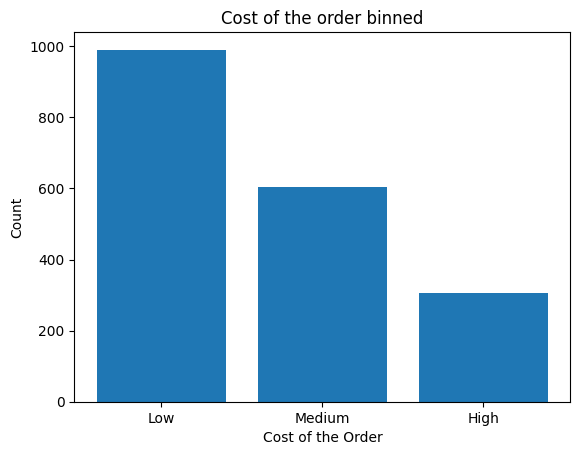

In [9]:
# let's plot the distribution of each bin
import matplotlib.pyplot as plt

plt.bar(group_names, df['cost_of_the_order_binned'].value_counts())
plt.xlabel('Cost of the Order')
plt.ylabel('Count')
plt.title('Cost of the order binned')

Text(0.5, 1.0, 'Cost of the order binned')

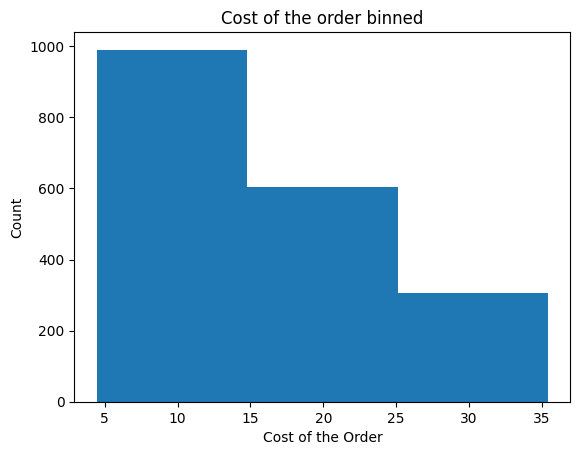

In [10]:
# let's plot this as histogram
# the process is the same as above but
# pyplot.bar(group_names, df['cost_of_the_order_binned'].value_counts()) this will be replaced with this one
plt.hist(df["cost_of_the_order"], bins = 3)
plt.xlabel('Cost of the Order')
plt.ylabel('Count')
plt.title('Cost of the order binned')


### Exploratory Data Analysis

Let's first look at the correlation between variables (features)

In [11]:
# first when we use correlation method, we must use only float or int columns
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
# in our dataset these columns have float data and are essential, others such as order_id, customer_id are not essential

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


As we see above frame, the correlation between cost of the order and the food preparation time is positive and about 0.042. Reversely, the correlation between the former and the delivery time is negative and it is also small, -0.030. If we see them in charts, they will look like that:

(0.0, 36.956999999999994)

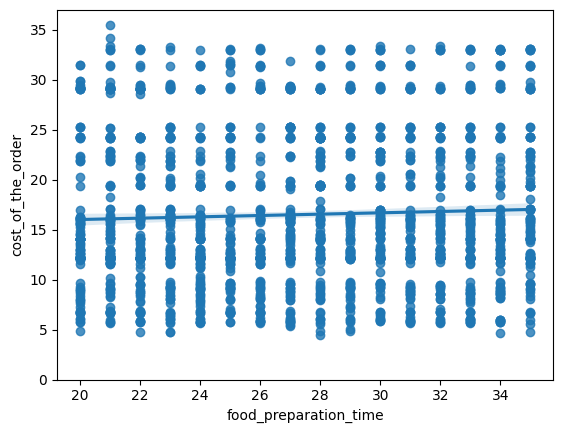

In [12]:
import seaborn as sbn 

sbn.regplot(x = 'food_preparation_time', y = 'cost_of_the_order', data=df)
plt.ylim(0,)



(0.0, 36.956999999999994)

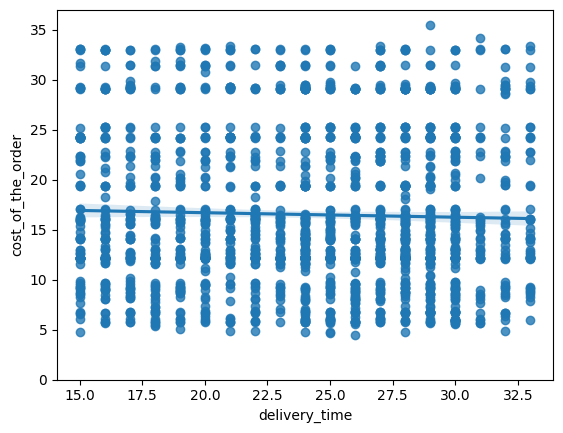

In [13]:
sbn.regplot(x = 'delivery_time', y = 'cost_of_the_order', data=df)
plt.ylim(0,)

As we have seen above, the two regression lines are almost horizontal, thus these two variables are not good predictor for cost of the order.

Well let's see what restaurants and type of cuisine are popular

In [14]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_of_the_order_binned
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,High
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,Low
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,Low
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,High
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,Low
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,Medium
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,Low
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,High
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,Low


In [15]:
df[['restaurant_name']].value_counts()

restaurant_name          
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: count, Length: 178, dtype: int64

In [16]:
df[['cuisine_type']].value_counts()

cuisine_type  
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

As we see, Shake Shack, The Meatball Shop, Blue Ribbon Sushi are popular restaurants, and American, Japanese, Italian, Chinese cuisines stand high. Let's see what types of cuisines these restaurants prepare.

In [17]:
df[df['restaurant_name']=='Shake Shack']['cuisine_type'].value_counts()

cuisine_type
American    219
Name: count, dtype: int64

In [18]:
df[df['restaurant_name']=='The Meatball Shop']['cuisine_type'].value_counts()

cuisine_type
Italian     112
American     20
Name: count, dtype: int64

In [19]:
df[df['restaurant_name']=='Blue Ribbon Sushi']['cuisine_type'].value_counts()

cuisine_type
Japanese    119
Name: count, dtype: int64

We can conclude that
- Shake Shack is American restaurant and it constitutes 37.5 percent of all American food order. There are may be other big distributor!
- The Meatball Shop is mostly Italian restaurant but it also provides with American food. This restaurant also provided about 37.6 percent of Italian food
- Blue Ribbon Sushi, as name suggests, is Japanese restaurant and this makes up roughly 25 percent of Japanese food order.
Let's look if there are other distributors of these cuisines.

In [20]:
df[df['cuisine_type'] == 'American']['restaurant_name'].value_counts()

restaurant_name
Shake Shack                    219
Blue Ribbon Fried Chicken       96
Five Guys Burgers and Fries     29
Bareburger                      27
The Meatball Shop               20
The Smile                       18
J. G. Melon                     15
Westville Hudson                15
P.J. Clarke's                   15
Burger Joint                    12
S'MAC                           12
Melt Shop                       11
Cafeteria                        9
Waverly Diner                    7
Sarabeth's East                  7
Sarabeth's Restaurant            7
Lucky's Famous Burgers           6
5 Napkin Burger                  5
Delicatessen                     5
Five Leaves                      4
Dirty Bird to Go                 4
Blue Ribbon Brooklyn             4
Friend of a Farmer               3
Dickson's Farmstand Meats        3
Sarabeth's                       3
Schnipper's Quality Kitchen      3
Bubby's                          3
Dirty Bird To Go (archived)      3
The 

Above we can see the restaurants that deliver the American foods

In [21]:
df[df['cuisine_type'] == 'Italian']['restaurant_name'].value_counts()

restaurant_name
The Meatball Shop               112
Parm                             68
Rubirosa                         37
Osteria Morini                   14
Otto Enoteca Pizzeria            12
Pepe Rosso To Go                  7
Serafina Fabulous Pizza           5
Vezzo Thin Crust Pizza            5
Tony's Di Napoli                  5
da Umberto                        3
Carmine's                         3
Bistango                          2
Olive Garden                      2
Piccolo Angolo                    2
Tarallucci e Vino Restaurant      2
Aurora                            2
UVA Wine Bar & Restaurant         2
Zero Otto Nove                    2
Paul & Jimmy's                    1
Emporio                           1
Coppola's East                    1
Il Bambino                        1
Le Zie 2000 Trattoria             1
Lamarca Pasta                     1
Gaia Italian Cafe                 1
Galli Restaurant                  1
La Follia                         1
Cipriani Le 

This is for Italian food.

In [22]:
df[df['cuisine_type'] == 'Japanese']['restaurant_name'].value_counts()

restaurant_name
Blue Ribbon Sushi                119
TAO                               49
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Sushi of Gari 46                  37
Momoya                            30
Blue Ribbon Sushi Izakaya         29
Sushi of Gari Tribeca             24
Yama Japanese Restaurant          18
Sushi of Gari                     16
Sushi Samba                       11
Donburi-ya                         7
Hatsuhana                          6
Yama 49                            5
Benihana                           5
The Loop                           4
Terakawa Ramen                     3
Kanoyama                           3
Go! Go! Curry!                     3
Izakaya Ten                        3
Asuka Sushi                        3
Mira Sushi                         2
Samurai Mama                       1
Haru Gramercy Park                 1
Hibino                             1
Taro Sushi                         1
Kambi Ramen House     

This shows the Japanese restaurants. In the top restaurants above, we did not meet the Chinese cuisines, so let's see it.

In [23]:
df[df['cuisine_type'] == 'Chinese']['restaurant_name'].value_counts()

restaurant_name
RedFarm Broadway               59
RedFarm Hudson                 55
Han Dynasty                    46
Vanessa's Dumplings            13
Xi'an Famous Foods              9
Vanessa's Dumpling House        9
CafÌ© China                     6
Joe's Shanghai _Àü£¾÷´        4
Grand Sichuan International     4
Prosperity Dumpling             3
Hot Kitchen                     2
Big Wong Restaurant _¤¾Ñ¼      1
Wo Hop Restaurant               1
Philippe Chow                   1
Hunan Manor                     1
Wa Jeal                         1
Name: count, dtype: int64

#### Let's illustrate all of these

Text(0.5, 1.0, 'Top Restaurants')

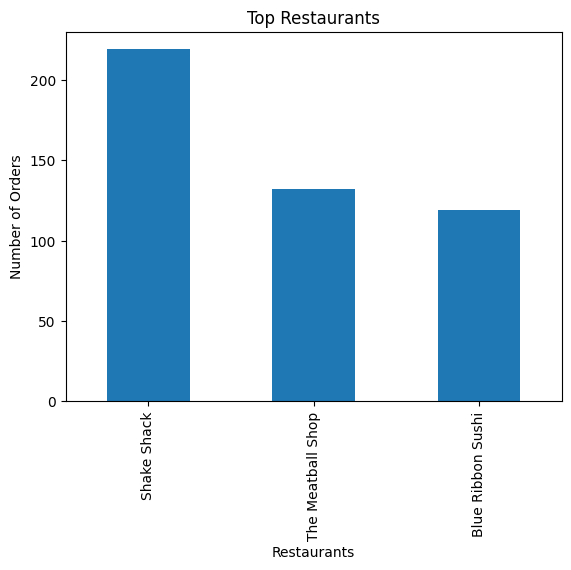

In [29]:
# we get 3 restaurants with high orders
top_restaurants = df['restaurant_name'].value_counts().iloc[0:3]
# we got 4 cuisines with high orders
top_cuisines = df['cuisine_type'].value_counts().iloc[0:4]

#let's plot these
top_restaurants.T.plot(kind = 'bar')
plt.xlabel('Restaurants')
plt.ylabel('Number of Orders')
plt.title('Top Restaurants')

Text(0.5, 1.0, 'Popular Restaurants')

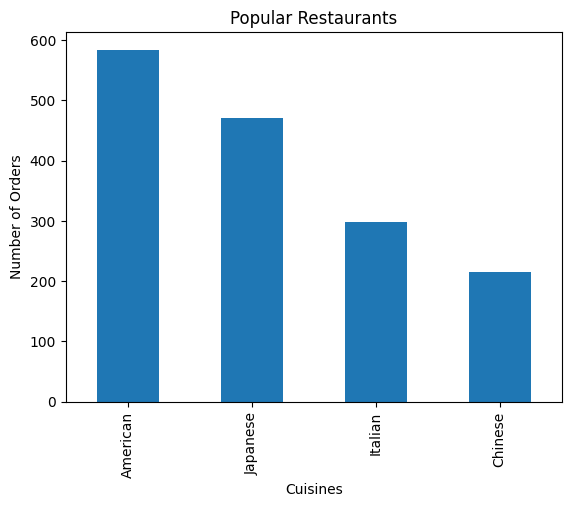

In [30]:
# this one is for cuisines
top_cuisines.T.plot(kind = 'bar')
plt.xlabel('Cuisines')
plt.ylabel('Number of Orders')
plt.title('Popular Restaurants')

### Conclusion
Through analysing the data we can conclude followings:
- Popular restaurants are : **Shake Shack**, **The Meatball Shop**, **Blue Ribbon Sushi**;
- Popular cuisines are: **American**(584), **Japanese**(470), **Italian**(298), **Chinese**(215);
- The major distributor of American cuisine is **Shake Shack** (219), others account for small proportions;
- The major distributor of Japanese cuisine is **Blue Ribbon Sushi**(119) which is delivered about 3 times more than did each of its rivals;
- The major distirbutor of Italian cuisine is **The Meatball Shop**(112). This also made up roughly twice as much as each of other restaurants;
- The major distributors of Chinese cuisine is **RedFarm Broadway**(59), **RedFarm Hudson**(55), **Han Dynasty**(46).